# Efecto Gibbs en el diseño de filtros FIR

*Ignacio Díaz Blanco, 2019. Universidad de Oviedo.

**Descripción** - En este ejemplo se muestra el fenómeno de Gibbs (dispersión espectral, *spectral leakage*). En el diseño de un filtro FIR utilizamos un número finito de coeficientes de la respuesta impulsional ideal $h(k)$ (con infinitos coeficientes no nulos). Normalmente se "trunca" la serie $h(k)$, lo que equivale a multiplicar por una ventana rectangular. 

Esta operación de producto en el tiempo tiene su contrapartida como una convolución de la respuesta en frecuencia ideal del filtro con la transformada de la ventana rectangular usada en el truncamiento $
\frac{sin(k x)}{k x}$ lo que produce lóbulos (no deseados) en la respuesta del filtro. 

En este ejemplo, se muestra esta idea.

In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.io.matlab import loadmat

%matplotlib inline

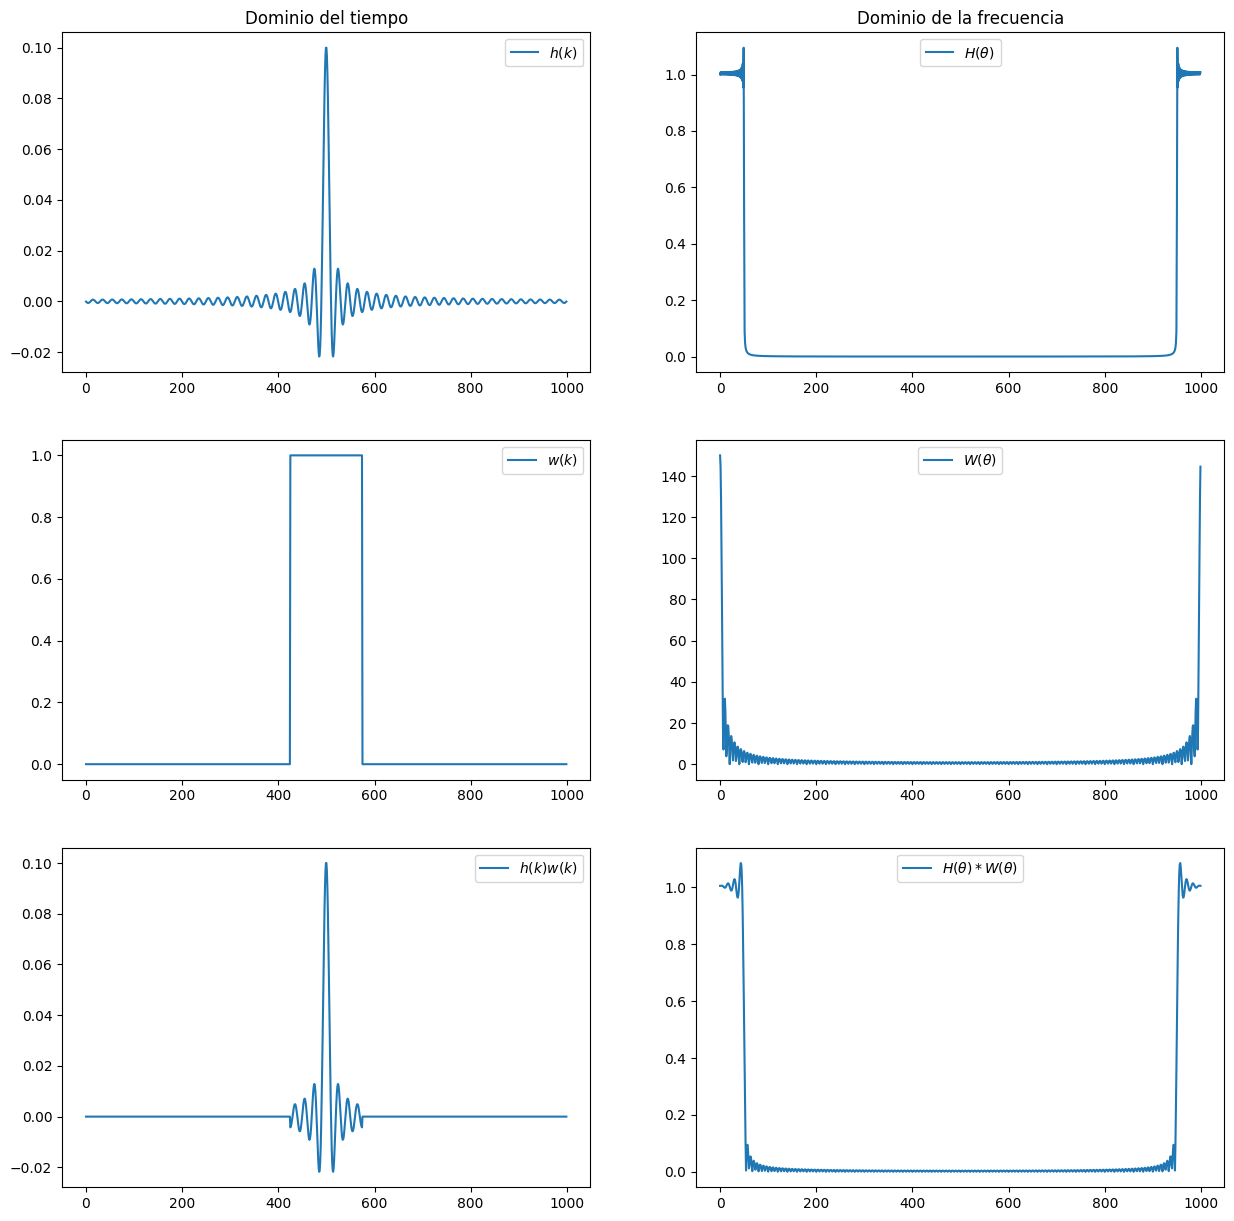

In [2]:

N = 1000;


# Definimos la antitransformada "pura" de la respuesta en frecuencia deseada
b = sig.firwin(N,0.1,window='boxcar');

# Número de elementos del filtro
Nf = 150;

# Creamos una ventana rectangular (la peor que hay, ya que queremos comprobar el efecto Gibbs), 
# que selecciona los elementos centrales del filtro
w = np.hstack((np.zeros(N//2-Nf//2),
               sig.windows.boxcar(Nf),
               np.zeros(N//2-Nf//2)))

bt= b*w;

B = np.abs(np.fft.fft(b));      # coeficients sin truncar
W = np.abs(np.fft.fft(w));      # ventana rectangular (truncamiento)
BT= np.abs(np.fft.fft(bt));     # coeficients truncados (con efecto Gibbs)


plt.figure(figsize=(15,15));
plt.clf();

plt.subplot(3,2,1)
plt.plot(b);
plt.axis('tight')
plt.title('Dominio del tiempo')
plt.legend(['$h(k)$'])

plt.subplot(3,2,3)
plt.plot(w);
plt.axis('tight')
plt.legend(['$w(k)$'])


plt.subplot(3,2,5);
plt.plot(bt);
plt.axis('tight')
plt.legend(['$h(k)w(k)$'])


plt.subplot(3,2,2)
plt.plot(B);
plt.axis('tight')
plt.title('Dominio de la frecuencia')
plt.legend(['$H(\\theta)$'])


plt.subplot(3,2,4)
plt.plot(W);
plt.axis('tight')
plt.legend(['$W(\\theta)$'])


plt.subplot(3,2,6);
plt.plot(BT);
plt.axis('tight')
plt.legend(['$H(\\theta)*W(\\theta)$']);

In [4]:

%%html
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">"Efecto Gibbs en el diseño de filtros FIR
"</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.